In [35]:
import Species
import Grid

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
%matplotlib inline

In [36]:
def FDENS(x, moat_left, ramp_length, plasma_length, N):
    rectangle_area = (plasma_length - ramp_length)
    triangle_area = 0.5 * ramp_length
    normalization = N / (rectangle_area + triangle_area)
    result = np.zeros_like(x)
    region1 = x < moat_left
    region2 = (x < moat_left + ramp_length) & ~region1
    region3 = (x < moat_left + plasma_length) & ~(region2 | region1)
    result[region2] = normalization * (x[region2] - moat_left) / ramp_length
    result[region3] = normalization
    return result

In [78]:
g = Grid.Grid(100, 100)
moat_left = g.L/4
ramp_length = g.L/4
plasma_length = g.L/2
N = 1000
dense_x = np.linspace(0, g.L, N*1000)
y = FDENS(dense_x, moat_left, ramp_length, plasma_length, N)

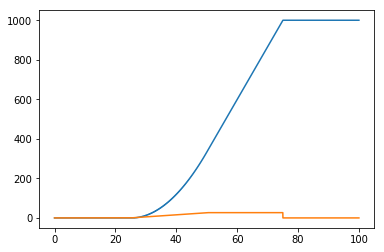

In [79]:
integrated = scipy.integrate.cumtrapz(y, dense_x).astype(int)
plt.plot(dense_x[1:], integrated)
plt.plot(dense_x, y)

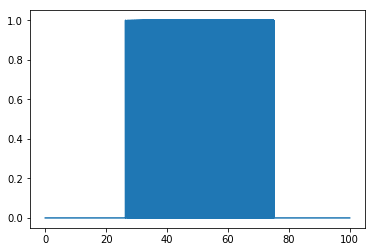

In [80]:
indices = (integrated[1:] - integrated[:-1]) == 1
plt.plot(dense_x[:-2], indices)

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000000 but corresponding boolean dimension is 999998
  from ipykernel import kernelapp as app


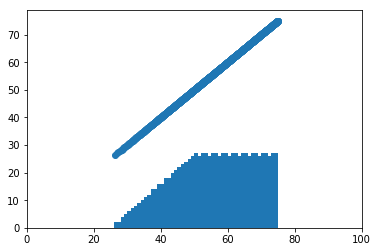

In [91]:
s = Species.Species(1, 1, N)
s.x = dense_x[0:][indices]
plt.scatter(s.x, s.x)
plt.xlim(0, g.L)
plt.hist(s.x, g.x);

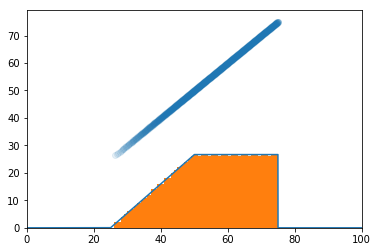

In [97]:
plt.plot(dense_x, y)
plt.scatter(s.x, s.x, alpha=0.1)
plt.xlim(0, g.L)
plt.hist(s.x, g.x);